# Some hypotheses/ideas to test

 - Maybe stick to just the paintings at MoMA? 
 - gender ratio of works over time
 - the directors of departments have a strong influence on makeup of the exhibitions (speculative/unclear how to analyze this question easily)
 - Size of paintings vs gender or vs time
 - Analyze the thumbnails for color choices over time / by gender
 - age when artists die
 - age when artists get first artwork into MoMA
 - Should we specify only catalogued things count?
 - Do bequeathments skew the numbers?
 
 
## Todo

 - Add link to [![DOI](https://zenodo.org/badge/doi/10.5281/zenodo.1324595.svg)](http://dx.doi.org/10.5281/zenodo.1324595) to powerpoint
 
[DOI](http://dx.doi.org/10.5281/zenodo.1324595)

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os
import missingno as msno

pd.options.display.max_columns = None
pd.options.display.max_rows = None

sns.set();
sns.set_context('poster', font_scale=1.3)
sns.set_style("white")

mpl_update = {
# 'font.size':16,
# 'xtick.labelsize':14,
# 'ytick.labelsize':14,
# 'figure.figsize':[12.0,8.0],
# 'axes.labelsize':20,

# 'axes.labelcolor':'#677385',
# 'axes.titlesize':20,
# 'lines.color':'#0055A7',
# 'lines.linewidth':3,
# 'text.color':'#677385',
'font.family': 'sans-serif',
'font.sans-serif': 'Tahoma'}
mpl.rcParams.update(mpl_update)


In [5]:
# load raw data
full_artists = pd.read_csv("../data/Artists.csv")
full_artworks = pd.read_csv("../data/Artworks.csv")

In [6]:
# cleaned data
artists = full_artists.copy()
works = full_artworks.copy()

In [7]:
# normalize the columns names
artists.columns = [
    col.replace(' ', '_').replace("(", "").replace(")", "").replace(
        ".", "").lower() for col in artists.columns
]
works.columns = [
    col.replace(' ', '_').replace("(", "").replace(")", "").replace(
        ".", "").lower() for col in works.columns
]

In [8]:
for col in artists.columns:
    print(col)

constituentid
displayname
artistbio
nationality
gender
begindate
enddate
wiki_qid
ulan


In [9]:
for col in works.columns:
    print(col)

title
artist
constituentid
artistbio
nationality
begindate
enddate
gender
date
medium
dimensions
creditline
accessionnumber
classification
department
dateacquired
cataloged
objectid
url
thumbnailurl
circumference_cm
depth_cm
diameter_cm
height_cm
length_cm
weight_kg
width_cm
seat_height_cm
duration_sec


In [10]:
works.describe()

,objectid,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,duration_sec
count,135318.000000,10.000000,13044.000000,1416.000000,116271.000000,738.000000,292.000000,115372.000000,0.0,3.162000e+03
mean,89077.211753,44.868020,16.757882,23.167022,37.565026,90.009375,1274.855486,38.027593,NaN,7.688498e+03
std,66364.477314,28.631604,55.444451,45.249009,47.733617,330.313873,11976.608071,66.681625,NaN,1.170374e+05
min,2.000000,9.900000,0.000000,0.635000,0.000000,0.000000,0.090000,0.000000,NaN,0.000000e+00
25%,35740.250000,23.500000,0.000000,7.800000,18.097500,17.100000,5.613300,17.780036,NaN,2.102500e+02
50%,72346.500000,36.000000,0.500000,13.652500,27.900000,26.700000,19.844900,25.400051,NaN,7.200000e+02
75%,136672.750000,71.125000,10.200000,24.773750,44.000000,79.700000,72.462100,44.500000,NaN,3.639750e+03
max,290236.000000,83.800000,1808.483617,914.400000,9140.000000,8321.056600,185067.585957,9144.000000,NaN,6.283065e+06


In [11]:
artists.describe()

,constituentid,begindate,enddate,ulan
count,15644.000000,15644.000000,15644.000000,2.938000e+03
mean,19895.490923,1459.735426,619.970979,5.000744e+08
std,18540.675469,830.128157,916.861353,8.658342e+04
min,1.000000,0.000000,0.000000,5.000000e+08
25%,4363.750000,1819.000000,0.000000,5.000176e+08
50%,9432.000000,1922.000000,0.000000,5.000331e+08
75%,34937.250000,1949.000000,1953.000000,5.001142e+08
max,74820.000000,2017.000000,2018.000000,5.003566e+08


These begin and end dates don't look particularly correct. What's going on?

In [12]:
artists.head()

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


Ah, it appears that missing values are given the value of 0. Let's check if that makes sense. 

In [13]:
artists[artists.begindate > 0].min()

constituentid                                       1
displayname      (follower of) José-Guadalupe  Posada
begindate                                        1730
enddate                                             0
ulan                                            5e+08
dtype: object

In [14]:
artists[artists.enddate > 0].sort_values(by='enddate').head()

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
5626,6278,Josiah Wedgwood,"British, 1730–1795",British,Male,1730,1795,Q319331,500062605.0
2027,2274,Francisco de Goya,"Spanish, 1746–1828",Spanish,Male,1746,1828,Q5432,500118936.0
482,542,Thomas Bewick,"British, 1753–1828",British,Male,1753,1828,NaN,NaN
7098,8067,Robert Adamson,"British, 1821–1848",British,Male,1821,1848,Q509636,500010587.0
11520,34418,Louis-Jacques-Mandé Daguerre,"French, 1787–1851",French,Male,1787,1851,Q131405,500022993.0


Ok, so artist who lived the farthest back in history in the collection at MoMA is Josiah Wedgwood.

In [15]:
artists.head()

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [16]:
works.artist.nunique()

14116

In [17]:
artists.constituentid.nunique()

15644

More artists than works?

## Questions 

Think about the column names -- be skeptical!

If you have modeling questions (try to break out the target variable from the analysis ASAP).

In [18]:
works.cataloged.value_counts().head(100)

Y    77510
N    57808
Name: cataloged, dtype: int64

In [19]:
works.classification.value_counts().head(100)

Photograph                        31353
Print                             31348
Illustrated Book                  26646
Drawing                           12295
Design                            11789
Mies van der Rohe Archive          3402
Architecture                       3151
Video                              2670
Film                               2545
Painting                           2293
Sculpture                          1690
Multiple                           1133
Periodical                          899
Installation                        812
Frank Lloyd Wright Archive          808
Audio                               787
(not assigned)                      751
Ephemera                            401
Work on Paper                       395
Media                                41
Performance                          29
Textile                              27
Poster                               24
Collage                               9
Photography Research/Reference        5


### Wow! That's a lot of photographs!

There are 13 times more photographs than of paintings at MoMA. The photographer Eugène Atget has 5,044 photographs at MoMA. This is more than double the total number of paintings at MoMA. If you want to simply count artwork at MoMA to get a sense of gender disparity, you might find that the naive way of counting things will skew things wildly.

What does it mean to be cataloged vs not? How can it be in this dataset if not cataloged? 


Should we include it not? -- Don't look at the answer you want to get (the gender distribution of cataloged vs not-cataloged) to decide how to split the data. 

# Data Issues

## Sanity Check: Acquisition dates

### Data error
"The Museum of Modern Art (MoMA) acquired its first works in 1929, the year it was established." --https://github.com/MuseumofModernArt/collection

In [20]:
works[works.dateacquired < '1928-01-01']

,title,artist,constituentid,artistbio,nationality,begindate,enddate,gender,date,medium,dimensions,creditline,accessionnumber,classification,department,dateacquired,cataloged,objectid,url,thumbnailurl,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,duration_sec
129764,Songs for Swinging Larvae,Residents,34673,"(USA, est. 1972)",(American),(1972),(0),(),1982,Video,NaN,Gift of the Artist,818629,Video,Film,1216-10-18,N,215774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# modify the cleaned version of the data to exclude (or fix) troublesome data.
works = works[works.dateacquired >= '1928-01-01'].copy()

In [22]:
# Set the date to a datetime type
works['dateacquired'] = pd.to_datetime(works['dateacquired'])

In [23]:
works.shape

(128667, 29)

## Gender assigned inconsistently

### Data error

Male/Female both capitalized and not-capitalized.

In [24]:
artists.gender.value_counts()

Male      10149
Female     2359
male         15
female        1
Name: gender, dtype: int64

In [25]:
artists['gender'] = artists.gender.str.lower()

In [26]:
artists.gender.value_counts()

male      10164
female     2360
Name: gender, dtype: int64

In [27]:
artists.head()

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN


In [28]:
works.head()

,title,artist,constituentid,artistbio,nationality,begindate,enddate,gender,date,medium,dimensions,creditline,accessionnumber,classification,department,dateacquired,cataloged,objectid,url,thumbnailurl,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,duration_sec
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


## Tidy Data

Hadley Wickham's concept of a tidy dataset summarized as:

 - Each variable forms a column
 - Each observation forms a row
 - Each type of observational unit forms a table
 
A longer paper describing this can be found in this [pdf](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf).

Having datasets in this form allows for much simpler analyses. So the first step is to try and clean up the dataset into a tidy dataset.

Notice that the `works` dataframe repeats artist data that we have in the artist table. We should discard these columns while maintaining the `constituentid` column so that we can join them if we need in the future. 

In [29]:
keep_works_columns = [
    col for col in works.columns
    if (col not in artists.columns) and (col not in ['artist']) or (
        col == 'constituentid')
]

In [30]:
works = works[keep_works_columns].copy()

In [31]:
artists.describe()

,constituentid,begindate,enddate,ulan
count,15644.000000,15644.000000,15644.000000,2.938000e+03
mean,19895.490923,1459.735426,619.970979,5.000744e+08
std,18540.675469,830.128157,916.861353,8.658342e+04
min,1.000000,0.000000,0.000000,5.000000e+08
25%,4363.750000,1819.000000,0.000000,5.000176e+08
50%,9432.000000,1922.000000,0.000000,5.000331e+08
75%,34937.250000,1949.000000,1953.000000,5.001142e+08
max,74820.000000,2017.000000,2018.000000,5.003566e+08


In [32]:
works.describe()

,objectid,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,duration_sec
count,128667.000000,10.000000,11488.000000,1356.000000,110435.000000,666.000000,292.000000,109524.000000,0.0,3.094000e+03
mean,85411.890088,44.868020,18.595849,23.424358,37.521945,85.142523,1274.855486,37.533461,NaN,7.811603e+03
std,64196.642874,28.631604,57.873050,46.192935,48.564939,346.609172,11976.608071,67.801179,NaN,1.183128e+05
min,2.000000,9.900000,0.000000,0.635000,0.000000,0.000000,0.090000,0.000000,NaN,0.000000e+00
25%,33898.500000,23.500000,0.000000,7.680004,17.900000,15.300000,5.613300,17.500000,NaN,2.130000e+02
50%,69308.000000,36.000000,1.270003,13.335000,27.800000,24.115000,19.844900,25.400000,NaN,7.200000e+02
75%,131211.500000,71.125000,14.000000,25.000000,43.800000,60.960122,72.462100,43.300000,NaN,3.658250e+03
max,290159.000000,83.800000,1808.483617,914.400000,9140.000000,8321.056600,185067.585957,9144.000000,NaN,6.283065e+06


## Characterize missing data

### Artworks

In [110]:
works_cols = [
    'title', 'date', 'thumbnailurl', 'dimensions', 'diameter_cm', 'height_cm', 'width_cm', 'duration_sec'
]

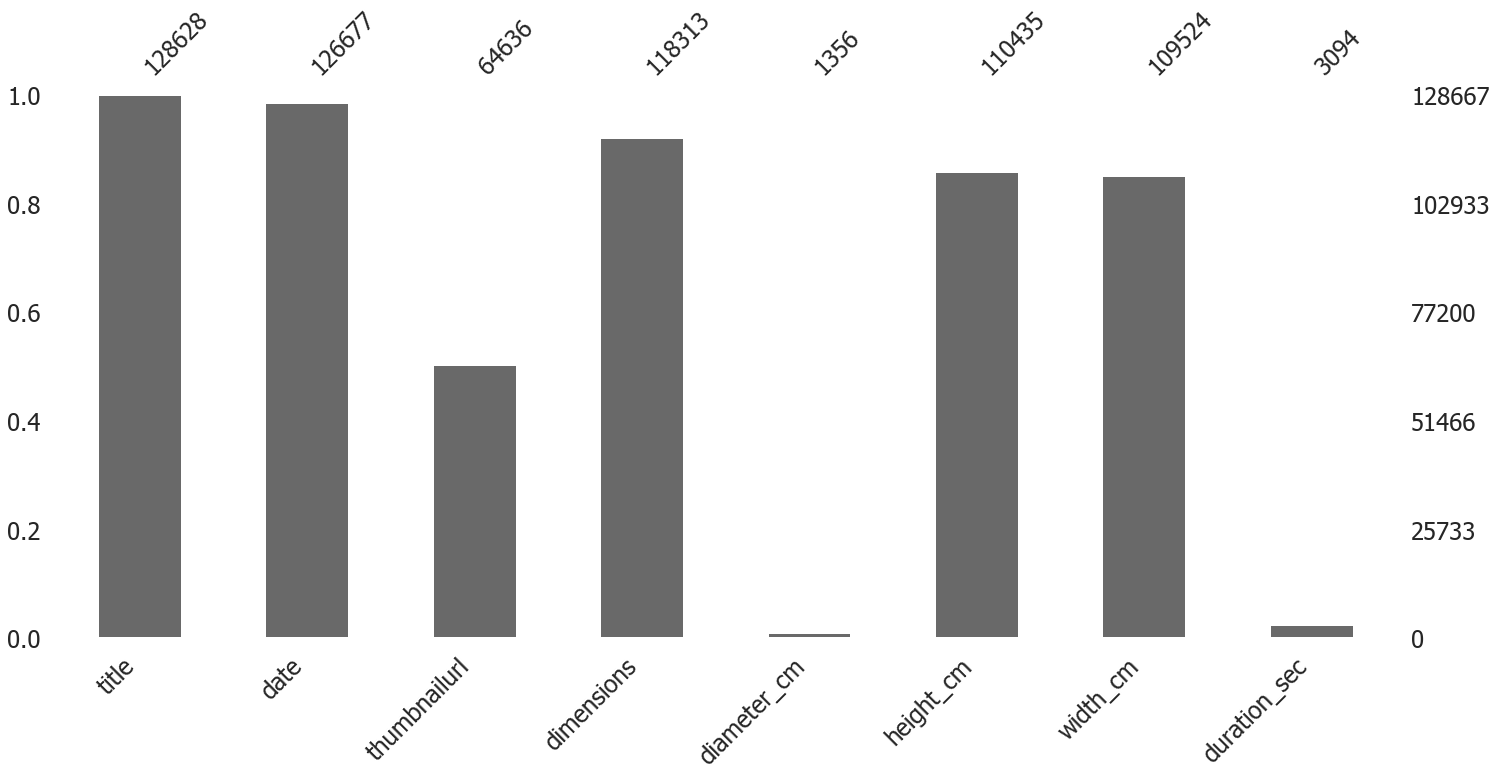

In [111]:
msno.bar(works[works_cols], fontsize=24);

Text(0.5,0,'Data fields')

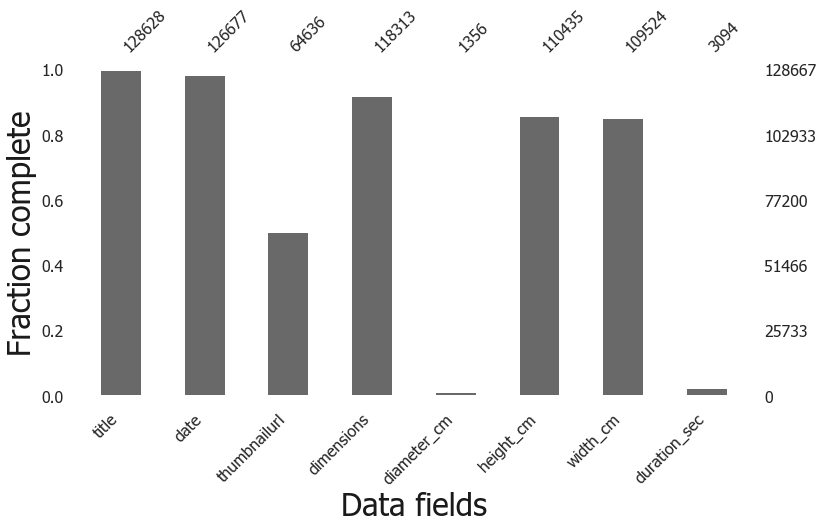

In [118]:
msno.bar(works[works_cols], figsize=(12, 6),)
fig = plt.gcf()
ax = fig.axes[0]
ax.set_ylabel("Fraction complete", color='k')
ax.set_xlabel("Data fields", color='k')

Text(0.5,0,'Data fields')

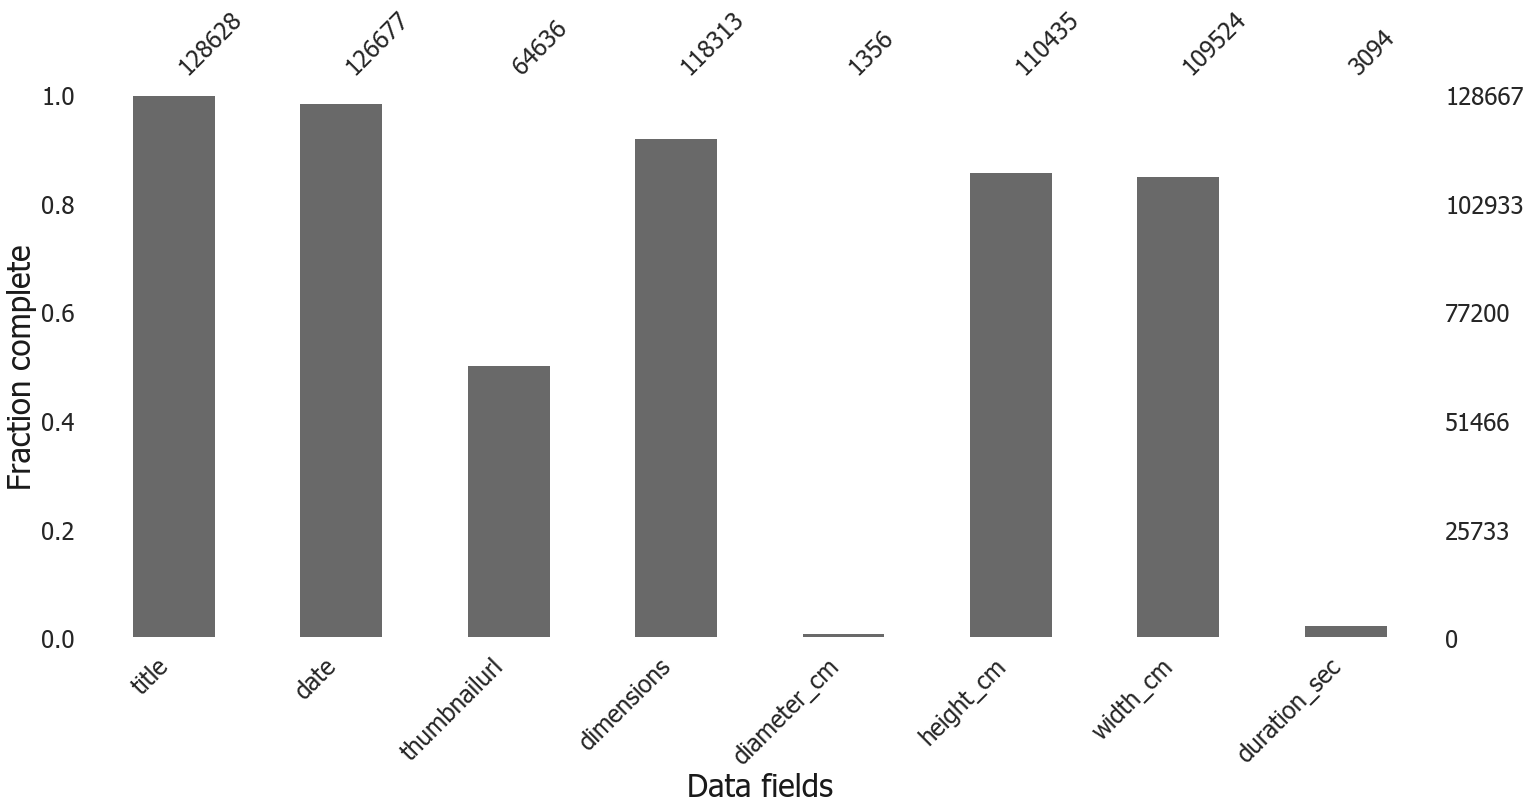

In [113]:
fig = msno.bar(works[works_cols], fontsize=24)
fig = plt.gcf()
ax = fig.axes[0]
ax.set_ylabel("Fraction complete", color='k')
ax.set_xlabel("Data fields", color='k')

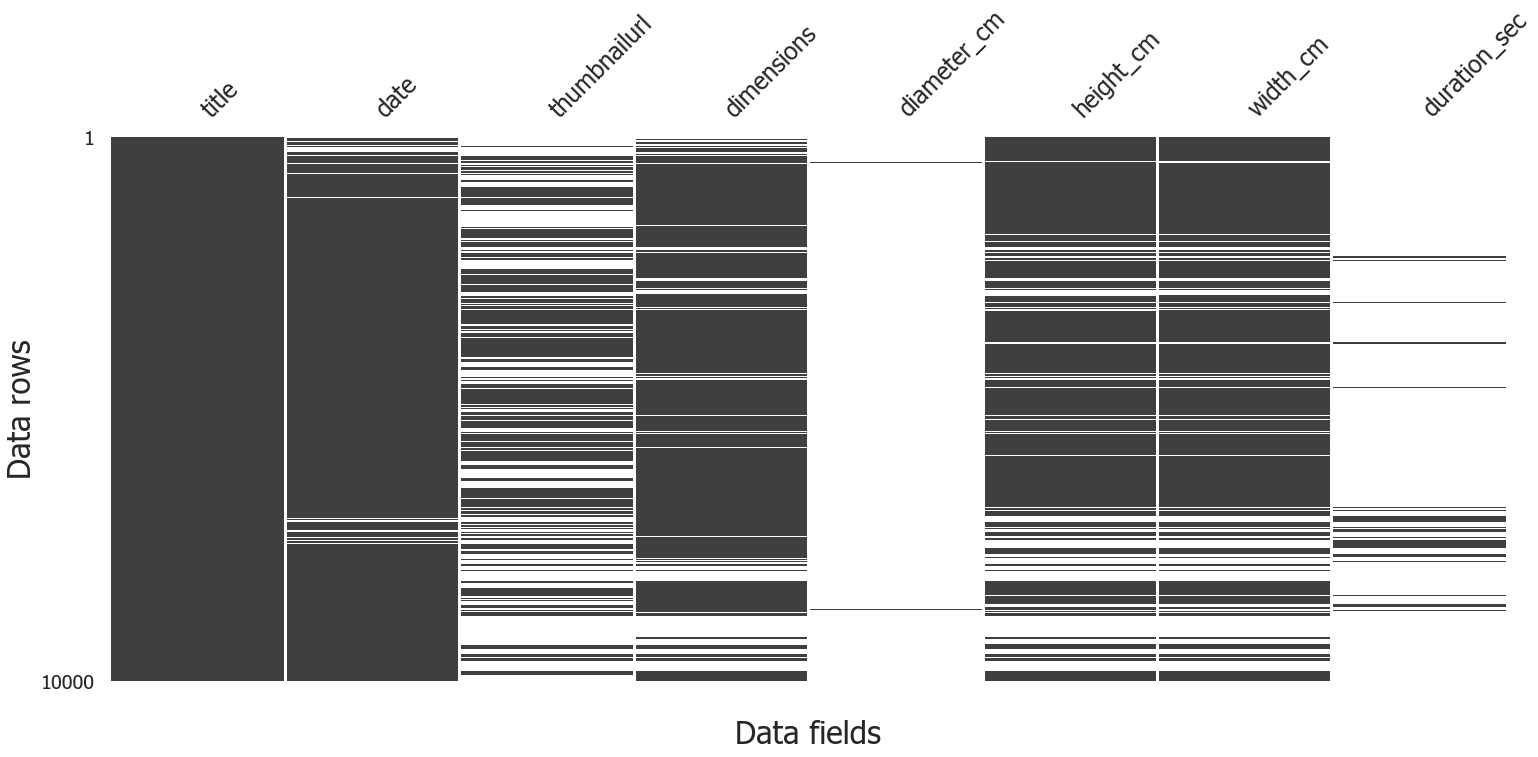

In [120]:
msno.matrix(works[works_cols].iloc[100000:110000], fontsize=24, sparkline=False)
fig = plt.gcf()
ax = fig.axes[0]
ax.set_ylabel("Data rows")
ax.set_xlabel("\nData fields");

In [130]:
first_artwork = combined.sort_values(by='dateacquired', ascending=True).groupby('constituentid').first()

In [131]:
first_artwork.shape

(11508, 30)

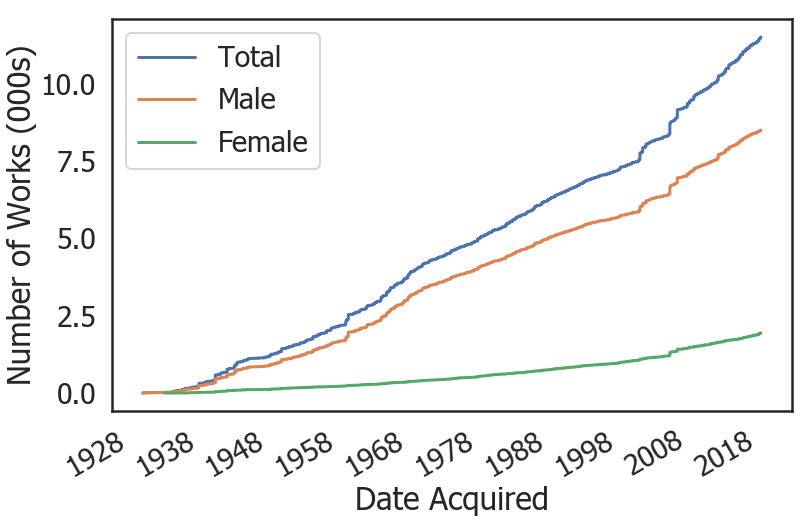

In [132]:
plot_gender_breakdown_over_time(first_artwork)

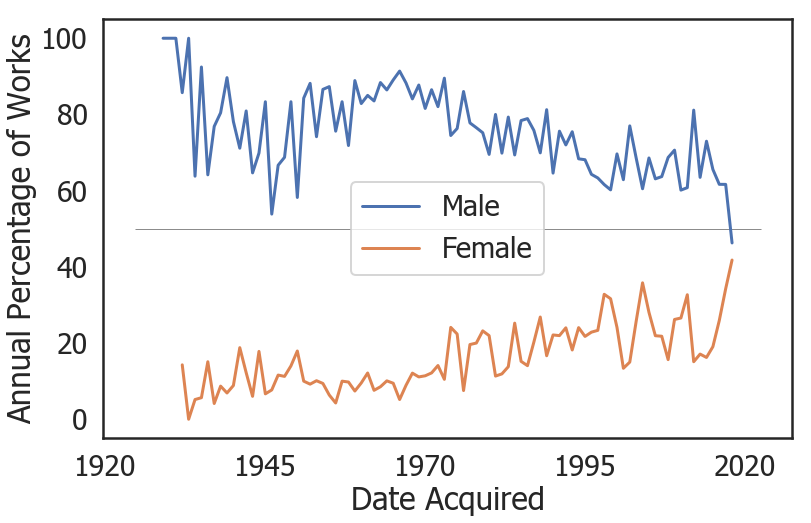

In [133]:
plot_gender_fraction_over_time(first_artwork)

In [139]:
combined[combined.constituentid.value_counts().index].head()

KeyError: "Index(['229', '710', '8595', '1633', '2002', '4609', '1055', '3832', '7166',\n       '665',\n       ...\n       '2387', '1181', '6054', '4141', '37050', '41475', '35575', '2721',\n       '37681', '8061'],\n      dtype='object', length=11508) not in index"

In [126]:
combined[combined.constituentid.eq('5260')]

,title,constituentid,date,medium,dimensions,creditline,accessionnumber,classification,department,dateacquired,cataloged,objectid,url,thumbnailurl,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,duration_sec,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
94597,The Lords of the World (Die Herren der Welt ),5260,(1922),Lithograph,"composition: 11 3/4 x 15 3/4"" (29.8 x 40 cm); ...",Gift of Paul J. Sachs,9.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59762,http://www.moma.org/collection/works/59762,http://www.moma.org/media/W1siZiIsIjEyMjcyMCJd...,NaN,NaN,NaN,29.8451,NaN,NaN,40.0000,NaN,NaN,Georg Scholz,"German, 1890–1945",German,male,1890,1945,Q536216,500018947.0
94598,Glorification of the Veteran's Association (Ap...,5260,1921,Lithograph,"composition: 15 13/16 x 11 3/4"" (40.2 x 29.8 c...",Gertrud A. Mellon Fund,294.1964,Print,Prints & Illustrated Books,1964-04-14,Y,66297,http://www.moma.org/collection/works/66297,http://www.moma.org/media/W1siZiIsIjEyMjcyNyJd...,NaN,NaN,NaN,40.2000,NaN,NaN,29.8000,NaN,NaN,Georg Scholz,"German, 1890–1945",German,male,1890,1945,Q536216,500018947.0
94599,Profiteering Farmer's Family (Wucherbauernfami...,5260,1920,Lithograph,"composition: 10 1/2 x 14 1/8"" (26.7 x 35.9 cm)...",Gift of Mrs. Bertha M. Slattery,307.1952,Print,Prints & Illustrated Books,1952-11-07,Y,66558,http://www.moma.org/collection/works/66558,http://www.moma.org/media/W1siZiIsIjEyMjcyNSJd...,NaN,NaN,NaN,26.7000,NaN,NaN,35.8776,NaN,NaN,Georg Scholz,"German, 1890–1945",German,male,1890,1945,Q536216,500018947.0
94600,Newspaper Carrier (Zeitungsträger) from the pe...,5260,"(1921, published 1923)",Lithograph,"composition: 7 7/8 x 8 11/16"" (20 x 22 cm); sh...",Purchase,513.1949,Print,Prints & Illustrated Books,1949-09-29,Y,70322,http://www.moma.org/collection/works/70322,http://www.moma.org/media/W1siZiIsIjEyMTkxMiJd...,NaN,NaN,NaN,20.0000,NaN,NaN,22.0000,NaN,NaN,Georg Scholz,"German, 1890–1945",German,male,1890,1945,Q536216,500018947.0


In [123]:
artists.head()

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN


In [125]:
artists.shape

(15644, 9)

In [124]:
works.head()

,title,constituentid,date,medium,dimensions,creditline,accessionnumber,classification,department,dateacquired,cataloged,objectid,url,thumbnailurl,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,duration_sec
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",7470,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",7605,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",7056,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",7605,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


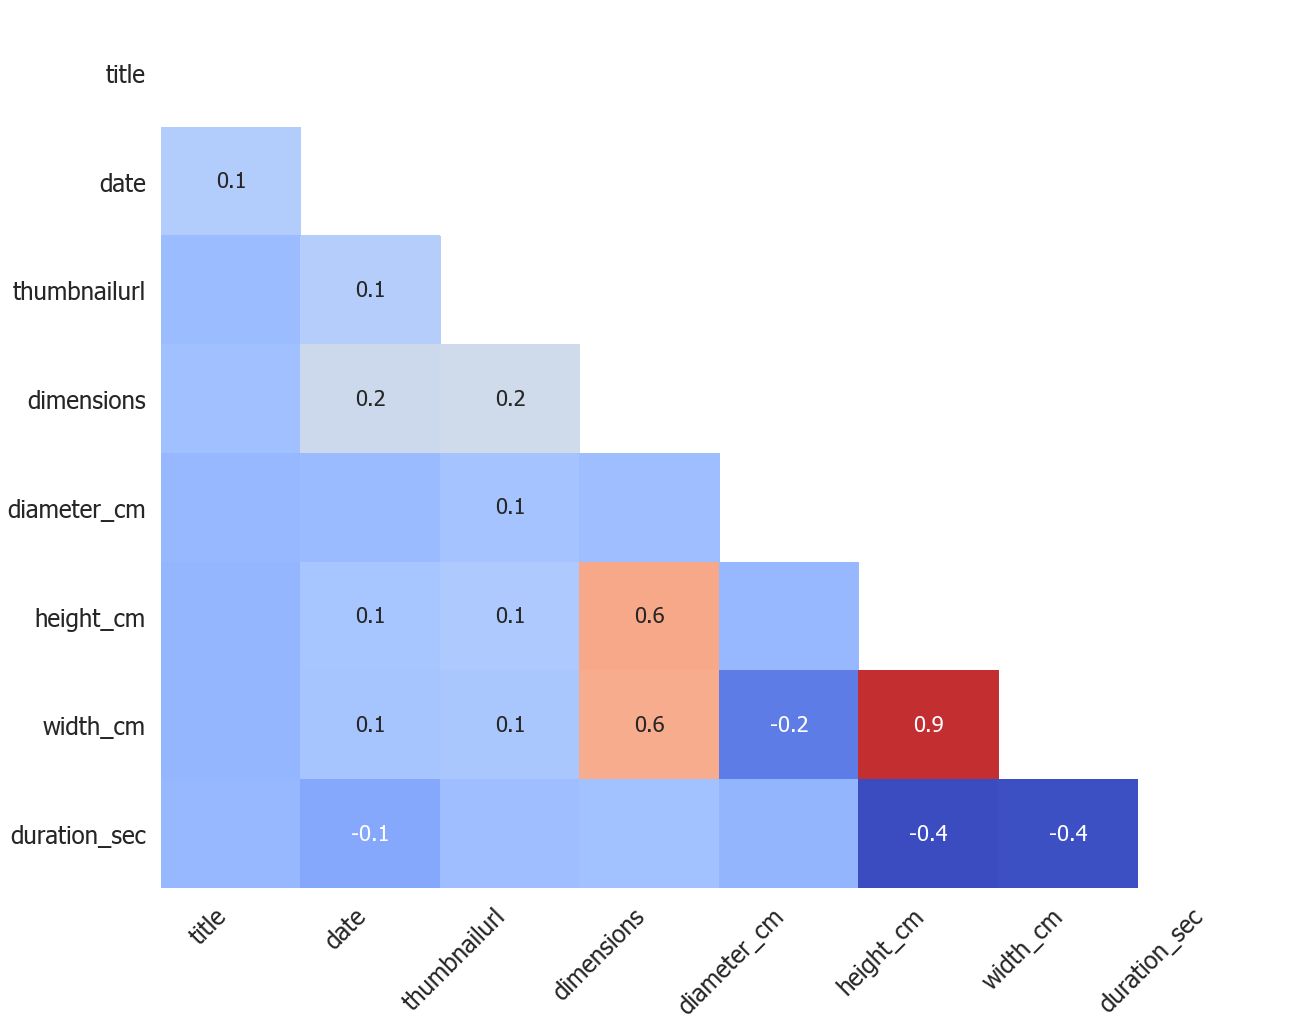

In [115]:
msno.heatmap(works[works_cols], fontsize=24, figsize=(20, 16), cmap='coolwarm', );

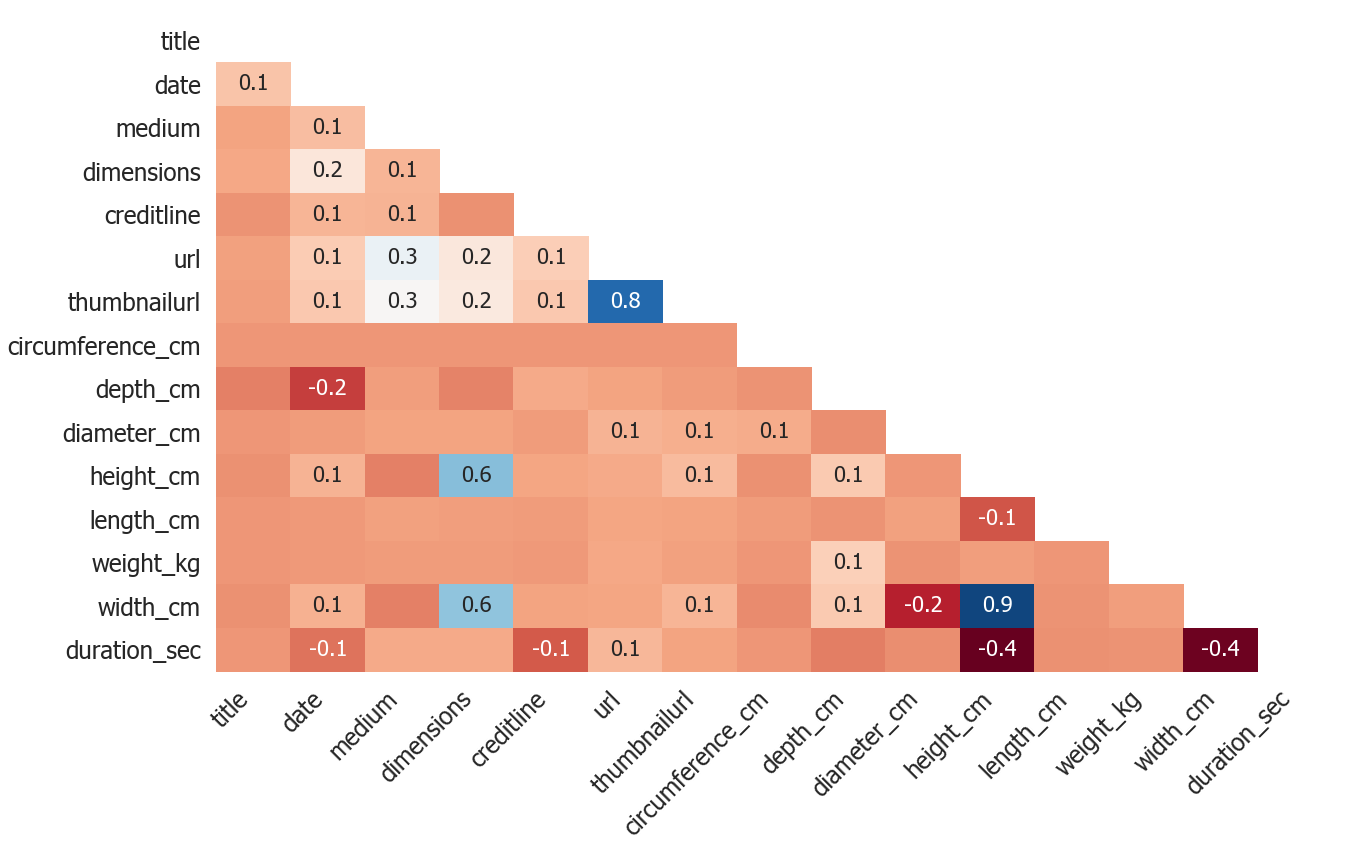

In [116]:
msno.heatmap(works, fontsize=24);

### Artists

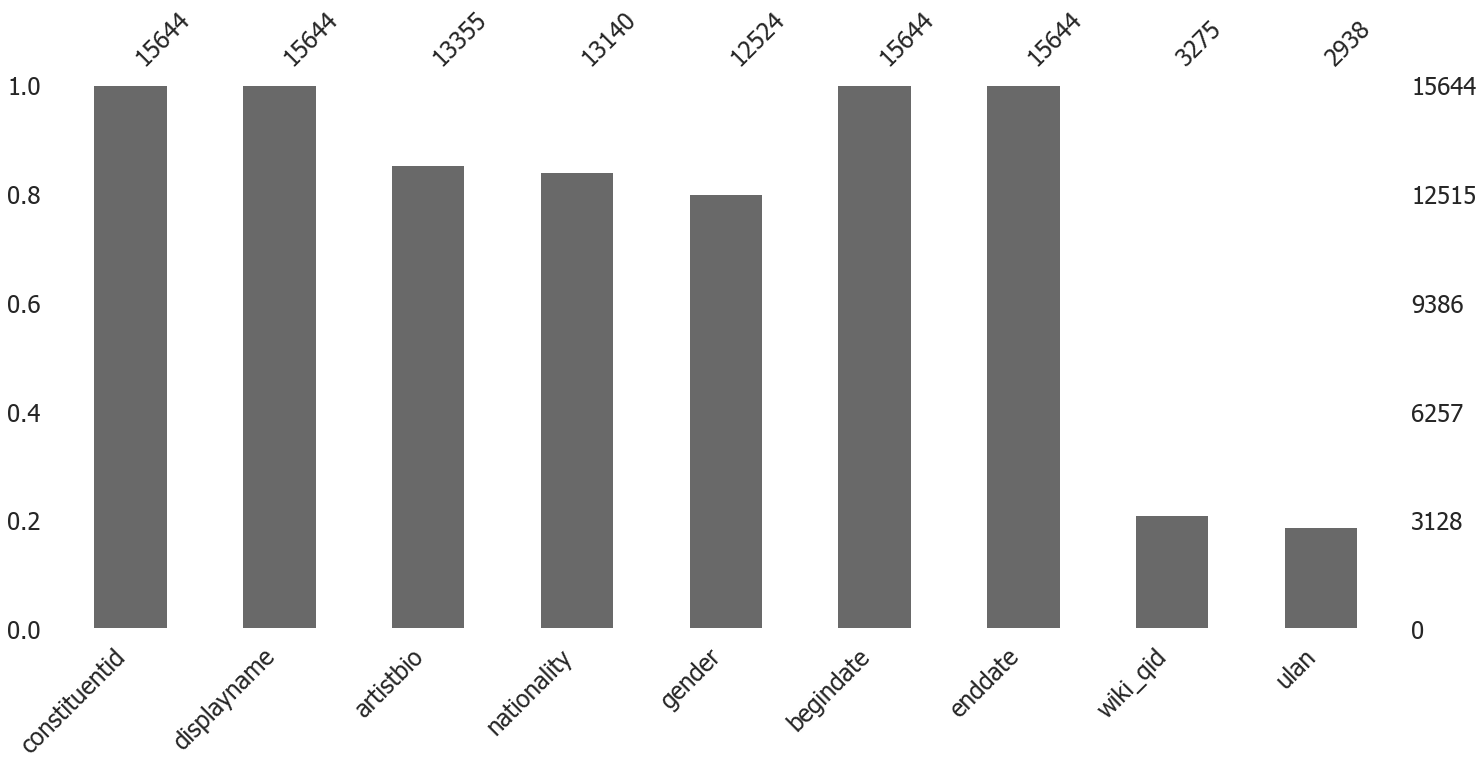

In [117]:
msno.bar(artists, fontsize=24);

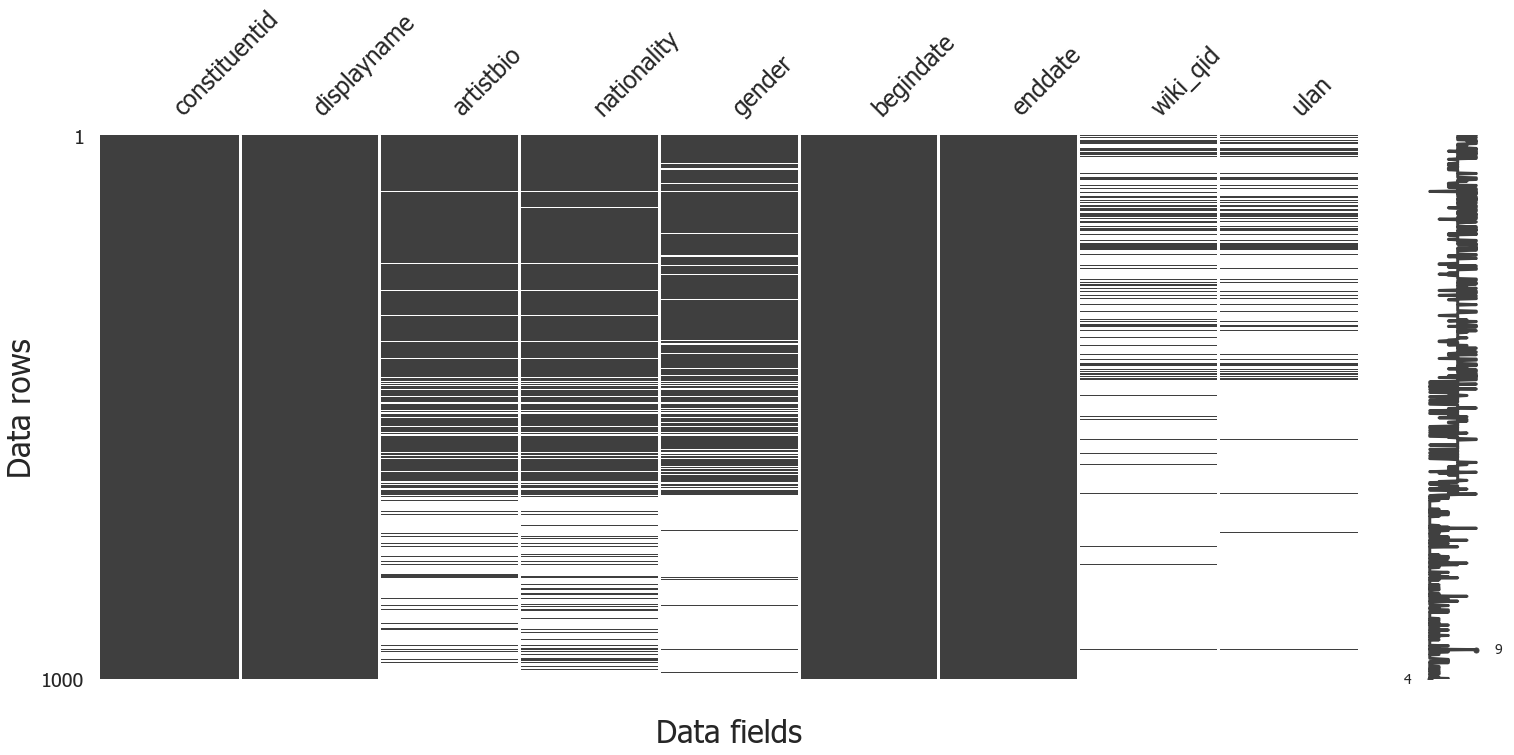

In [100]:
msno.matrix(artists.iloc[7000:8000], fontsize=24)
fig = plt.gcf()
ax = fig.axes[1]
ax.set_ylabel("Data rows")
ax.set_xlabel("\nData fields");

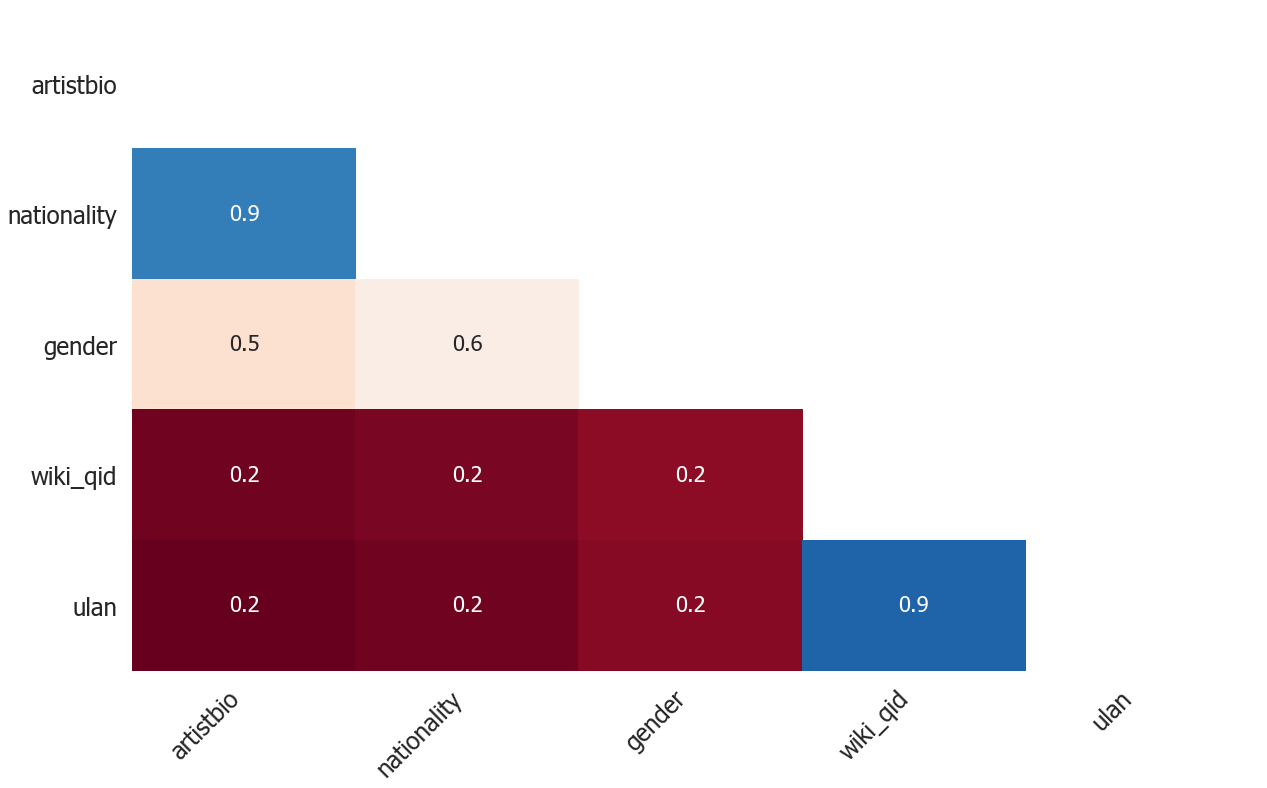

In [49]:
msno.heatmap(artists, fontsize=24);

## Re-group data into functional derived tables

In [50]:
# needed to join 
artists['constituentid'] = artists.constituentid.astype(str)
works['constituentid'] = works.constituentid.astype(str)

In [51]:
artists.dtypes

constituentid     object
displayname       object
artistbio         object
nationality       object
gender            object
begindate          int64
enddate            int64
wiki_qid          object
ulan             float64
dtype: object

In [52]:
combined = pd.merge(works, artists, how='inner', left_on='constituentid', right_on='constituentid')

In [53]:
combined.shape

(120603, 31)

In [54]:
works.shape

(128667, 23)

In [55]:
works[~works.constituentid.isin(combined.constituentid)].head(10)['constituentid']

65                 6969, 8134
66                 6956, 6957
76           7661, 8131, 8180
107                 27, 24452
110          8102, 6703, 4312
111          8102, 6703, 4312
112          8102, 4312, 6703
113          8102, 6703, 4312
151          8707, 6951, 6952
154    6956, 7559, 7558, 6957
Name: constituentid, dtype: object

In [56]:
# Multi-constituentids mean we miss ~6% of the artworks in the collection.
(works.shape[0] - combined.shape[0]) / works.shape[0] * 100

6.267341276317937

In [57]:
combined.head()

,title,constituentid,date,medium,dimensions,creditline,accessionnumber,classification,department,dateacquired,cataloged,objectid,url,thumbnailurl,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,duration_sec,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,male,1841,1918,Q84287,500016971.0
1,Armchair,6210,1902,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",Estée and Joseph Lauder Design Fund,479.1978,Design,Architecture & Design,1978-09-27,Y,4023,http://www.moma.org/collection/works/4023,http://www.moma.org/media/W1siZiIsIjIyOTgzNyJd...,NaN,51.5000,NaN,78.5000,NaN,NaN,56.5000,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,male,1841,1918,Q84287,500016971.0
2,Stool,6210,1904,"Bent beech wood, molded plywood, and aluminum","18 1/2 x 16 x 16"" (47 x 40.6 x 40.6 cm)",Estée and Joseph Lauder Design Fund,480.1978,Design,Architecture & Design,1978-09-27,Y,4026,http://www.moma.org/collection/works/4026,http://www.moma.org/media/W1siZiIsIjU5MTMwIl0s...,NaN,40.6401,NaN,46.9901,NaN,NaN,40.6401,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,male,1841,1918,Q84287,500016971.0
3,Railing,6210,1899,Painted cast-iron,"28 1/4 x 46 1/2 x 3"" (72.4 x 117.5 x 7.6 cm)",Dorothy Cullman Purchase Fund,1394.2001,Architecture,Architecture & Design,2001-05-11,Y,82125,http://www.moma.org/collection/works/82125,http://www.moma.org/media/W1siZiIsIjYyMTEzIl0s...,NaN,7.6000,NaN,72.4000,NaN,NaN,117.5000,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,male,1841,1918,Q84287,500016971.0
4,"City of Music, National Superior Conservatory ...",7470,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,Christian de Portzamparc,"French, born 1944",French,male,1944,0,Q312838,500024982.0


In [58]:
# another data issue
combined.gender.value_counts(dropna=False).head()

male      97848
female    16205
NaN        6550
Name: gender, dtype: int64

In [62]:
def plot_gender_breakdown_over_time(df, title=None):
    """Calculates cumulative number of artworks by gender. Plots the values over time."""
    df = df.sort_values(by='dateacquired').set_index('dateacquired').copy()
    df['ones'] = 1
    works_man = df[df.gender.eq('male')].copy()
    works_woman = df[df.gender.eq('female')].copy()
    works_other = df[(~df.gender.eq('female'))
                              & (~df.gender.eq('male'))].copy()
    df['num_acquired'] = df.ones.cumsum()
    works_man['num_acquired'] = works_man.ones.cumsum()
    works_woman['num_acquired'] = works_woman.ones.cumsum()
    works_other['num_acquired'] = works_other.ones.cumsum()
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    (df['num_acquired']/1000).plot(ax=ax, label="Total")
    (works_man['num_acquired']/1000).plot(ax=ax, label="Male")
    (works_woman['num_acquired']/1000).plot(ax=ax, label="Female")
    # works_other['num_acquired'].plot(ax=ax, label="Multi-artist")
    ax.set_xlabel("Date Acquired")
    ax.set_ylabel("Number of Works (000s)")
    if title:
        ax.set_title(title)
    ax.legend()
    fig.tight_layout()

def plot_total_over_time(df, title=None):
    """Calculates cumulative number of artworks by gender. Plots the values over time."""
    df = df.sort_values(by='dateacquired').set_index('dateacquired').copy()
    df['ones'] = 1
    works_man = df[df.gender.eq('male')].copy()
    works_woman = df[df.gender.eq('female')].copy()
    works_other = df[(~df.gender.eq('female'))
                              & (~df.gender.eq('male'))].copy()
    df['num_acquired'] = df.ones.cumsum()
    works_man['num_acquired'] = works_man.ones.cumsum()
    works_woman['num_acquired'] = works_woman.ones.cumsum()
    works_other['num_acquired'] = works_other.ones.cumsum()
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    (df['num_acquired']/1000).plot(ax=ax, label="Total")
#     (works_man['num_acquired']/1000).plot(ax=ax, label="Male")
#     (works_woman['num_acquired']/1000).plot(ax=ax, label="Female")
    # works_other['num_acquired'].plot(ax=ax, label="Multi-artist")
    ax.set_xlabel("Date Acquired")
    ax.set_ylabel("Number of Works (000s)")
    if title:
        ax.set_title(title)
    ax.legend()
    fig.tight_layout()

def plot_gender_fraction_over_time(df, title=None):
    """Calculates the annual fraction of artworks by gender. Plots the ratio over time."""
    df = df.sort_values(by='dateacquired').set_index('dateacquired').copy()
    df['ones'] = 1
    works_man = df[df.gender.eq('male')].copy()
    works_woman = df[df.gender.eq('female')].copy()
    works_other = df[(~df.gender.eq('female'))
                              & (~df.gender.eq('male'))].copy()
    df['num_acquired'] = df.ones.cumsum()
    works_man['num_acquired'] = works_man.ones.cumsum()
    works_woman['num_acquired'] = works_woman.ones.cumsum()
    works_other['num_acquired'] = works_other.ones.cumsum()
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    time_group = 'Y'
    (100 * (works_man.groupby(pd.Grouper(freq=time_group))['ones'].count()) /
     (df.groupby(pd.Grouper(freq=time_group))['ones'].count())).plot(
         ax=ax, label="Male")
    (100 * (works_woman.groupby(pd.Grouper(freq=time_group))['ones'].count()) /
     (df.groupby(pd.Grouper(freq=time_group))['ones'].count())).plot(
         ax=ax, label="Female")
    xlims = ax.get_xlim()
    ax.hlines(50, np.min(xlims), np.max(xlims), lw=0.5)
    ax.set_xlim = xlims
    ax.set_xlabel("Date Acquired")
    ax.set_ylabel("Annual Percentage of Works")
    if title:
        ax.set_title(title)
    ax.legend(loc='best')
    fig.tight_layout()
    


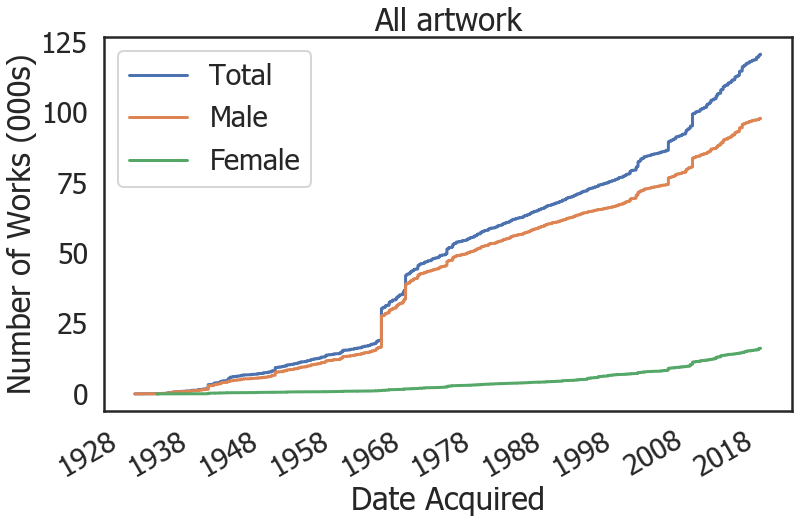

In [63]:
plot_gender_breakdown_over_time(combined, title="All artwork")

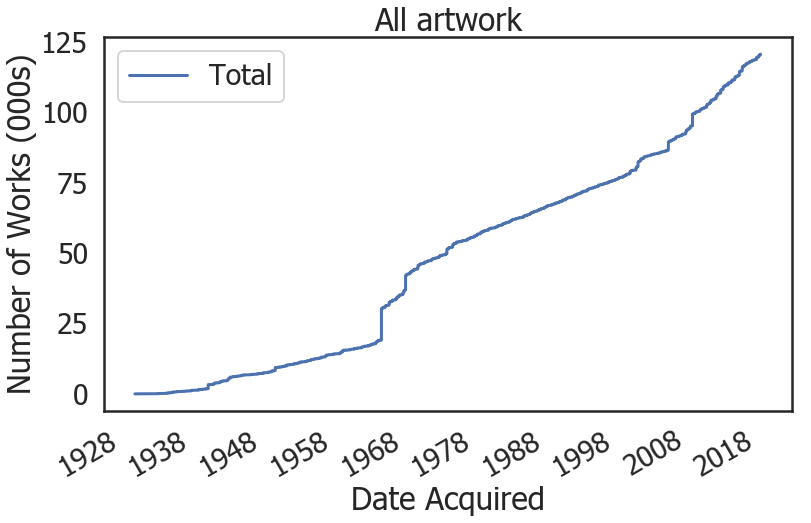

In [64]:
plot_total_over_time(combined, title="All artwork")

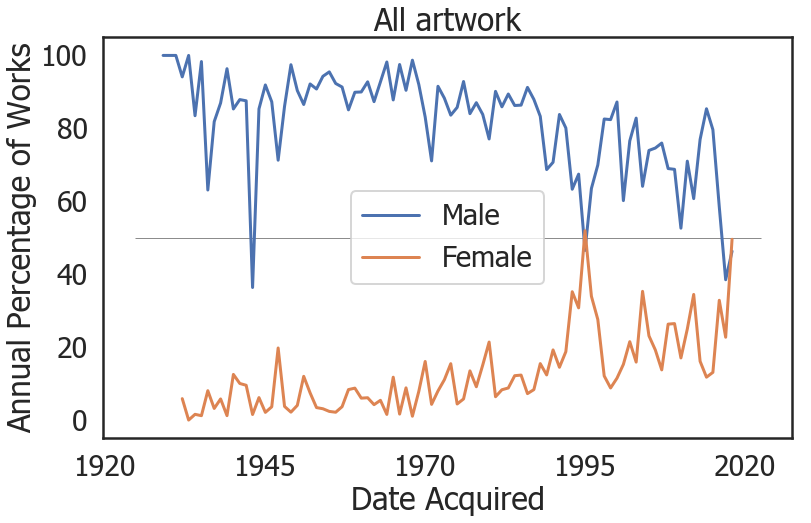

In [65]:
plot_gender_fraction_over_time(combined, title="All artwork")

In [66]:
ls ../data/

Artists.csv     Artworks.csv    MetObjects.csv


In [67]:
all_directors = pd.read_csv("../../MoMA/exhibitions/MoMADirectorsDepartmentHeads.csv")

In [68]:
directors = all_directors[all_directors.PositionNote.eq('Director')].copy()

In [69]:
directors

,DepartmentFullName,DepartmentBeginYear,DepartmentEndYear,ConstituentID,DisplayName,PositionNote,PositionBeginYear,PositionEndYear,ConstituentType,AlphaSort,FirstName,MiddleName,LastName,Suffix,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID
0,The Museum of Modern Art,1929,NaN,9168.0,"Alfred H. Barr, Jr.",Director,1929,1943.0,Individual,Barr Alfred H. Jr.,Alfred,H.,Barr,Jr.,American,1902.0,1981.0,"American, 1902–1981",Male,109252853.0,Q711362,500241556.0
1,The Museum of Modern Art,1929,NaN,10779.0,René d'Harnoncourt,Director,1949,1968.0,Individual,d'Harnoncourt René,René,NaN,d'Harnoncourt,NaN,American,1901.0,1968.0,"American, 1901–1968",Male,176768.0,Q7312958,500071210.0
2,The Museum of Modern Art,1929,NaN,11389.0,Bates Lowry,Director,1968,1969.0,Individual,Lowry Bates,Bates,NaN,Lowry,NaN,American,1924.0,2004.0,"American, 1924–2004",Male,71883331.0,Q4868805,500279878.0
3,The Museum of Modern Art,1929,NaN,NaN,John B. Hightower,Director,1970,1972.0,Individual,Hightower John B.,John,Brantley,Hightower,NaN,American,1933.0,2013.0,"American, 1933–2013",Male,65771126.0,Q15431531,NaN
4,The Museum of Modern Art,1929,NaN,13047.0,Richard E. Oldenburg,Director,1972,1994.0,Individual,Oldenburg Richard E.,Richard,E.,Oldenburg,NaN,American,1933.0,NaN,"American, born 1933",Male,22054670.0,Q7328159,NaN
5,The Museum of Modern Art,1929,NaN,30333.0,Glenn D. Lowry,Director,1995,NaN,Individual,Lowry Glenn D.,Glenn,D.,Lowry,NaN,American,1954.0,NaN,"American, born 1954",Male,165457793.0,Q5568749,500251278.0


## Director overlay

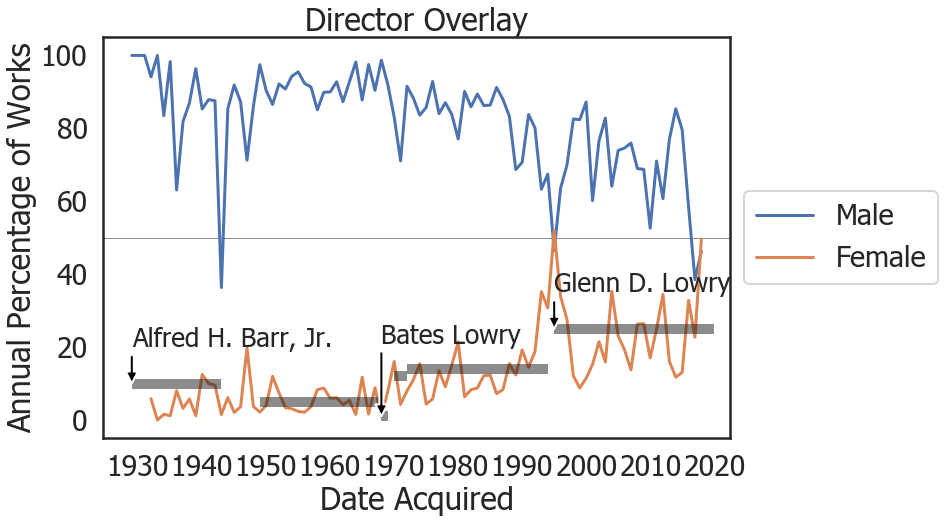

In [70]:
# TODO get real numbers here
directors['percent_female'] = 100 * np.array([.1, .05, .01, .12, .14, .25])
directors['offset'] = np.array([10, 15, 20, 10, 8, 10])

directors['beginyear'] = pd.to_datetime(
    directors.PositionBeginYear.astype(str))
directors['endyear'] = pd.to_datetime(
    directors.PositionEndYear.fillna(2020.0).astype(int).astype(str))
directors[['DisplayName', 'beginyear', 'endyear', 'percent_female', 'offset']]


def plot_gender_percent_director_overlay(df, title=None):
    """Calculates the annual fraction of artworks by gender. Plots the ratio over time."""
    df = df.sort_values(by='dateacquired').set_index('dateacquired').copy()
    df['ones'] = 1
    works_man = df[df.gender.eq('male')].copy()
    works_woman = df[df.gender.eq('female')].copy()
    works_other = df[(~df.gender.eq('female'))
                     & (~df.gender.eq('male'))].copy()
    df['num_acquired'] = df.ones.cumsum()
    works_man['num_acquired'] = works_man.ones.cumsum()
    works_woman['num_acquired'] = works_woman.ones.cumsum()
    works_other['num_acquired'] = works_other.ones.cumsum()

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    time_group = 'Y'
    (100 * (works_man.groupby(pd.Grouper(freq=time_group))['ones'].count()) /
     (df.groupby(pd.Grouper(freq=time_group))['ones'].count())).plot(
         ax=ax, label="Male")
    (100 * (works_woman.groupby(pd.Grouper(freq=time_group))['ones'].count()) /
     (df.groupby(pd.Grouper(freq=time_group))['ones'].count())).plot(
         ax=ax, label="Female")
    xlims = ax.get_xlim()
    ax.hlines(50, np.min(xlims), np.max(xlims), lw=0.5)
    for index, row in directors[[
            'DisplayName', 'beginyear', 'endyear', 'percent_female', 'offset'
    ]].iterrows():
        ax.hlines(
            row.percent_female,
            row.beginyear,
            row.endyear,
            zorder=3,
            lw=10,
            alpha=0.5)
        if index in [0, 2, 5]:
            ax.annotate(
                row.DisplayName,
                xy=(row.beginyear, row.percent_female),
                xytext=(row.beginyear, row.percent_female + row.offset),
                arrowprops=dict(facecolor='black', ),
                fontsize=26)

    ax.set_xlim(xlims)
    ax.set_xlim = (10, 20)
    ax.set_ylim((-5, 105))
    ax.set_xlabel("Date Acquired")
    ax.set_ylabel("Annual Percentage of Works")
    if title:
        ax.set_title(title)


#     ax.legend(loc='best')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()

plot_gender_percent_director_overlay(combined, title="Director Overlay")

# Paintings

In [74]:
paintings = combined[combined.classification.eq('Painting')]

In [75]:
artists[artists.constituentid.isin(
    paintings.constituentid.value_counts().head(10).index.tolist())]

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
1449,1633,Jean Dubuffet,"French, 1901–1985",French,male,1901,1985,Q170076,500019113.0
2153,2419,Philip Guston,"American, born Canada. 1913–1980",American,male,1913,1980,Q701952,500023901.0
2710,3030,On Kawara,"Japanese, 1933–2014",Japanese,male,1933,0,Q698256,500120601.0
3053,3418,Jacob Lawrence,"American, 1917–2000",American,male,1917,2000,Q355566,500027690.0
3433,3832,Henri Matisse,"French, 1869–1954",French,male,1869,1954,Q5589,500017300.0
4133,4609,Pablo Picasso,"Spanish, 1881–1973",Spanish,male,1881,1973,Q5593,500009666.0
4338,4840,Odilon Redon,"French, 1840–1916",French,male,1840,1916,Q154349,500007292.0
5053,5640,Frank Stella,"American, born 1936",American,male,1936,0,Q375268,500020533.0
5479,6115,Ben Vautier,"French, born Italy. 1935",French,male,1935,0,Q604546,500011704.0
11780,35204,Batiste Madalena,"American, 1902–1988",American,male,1902,1988,NaN,NaN


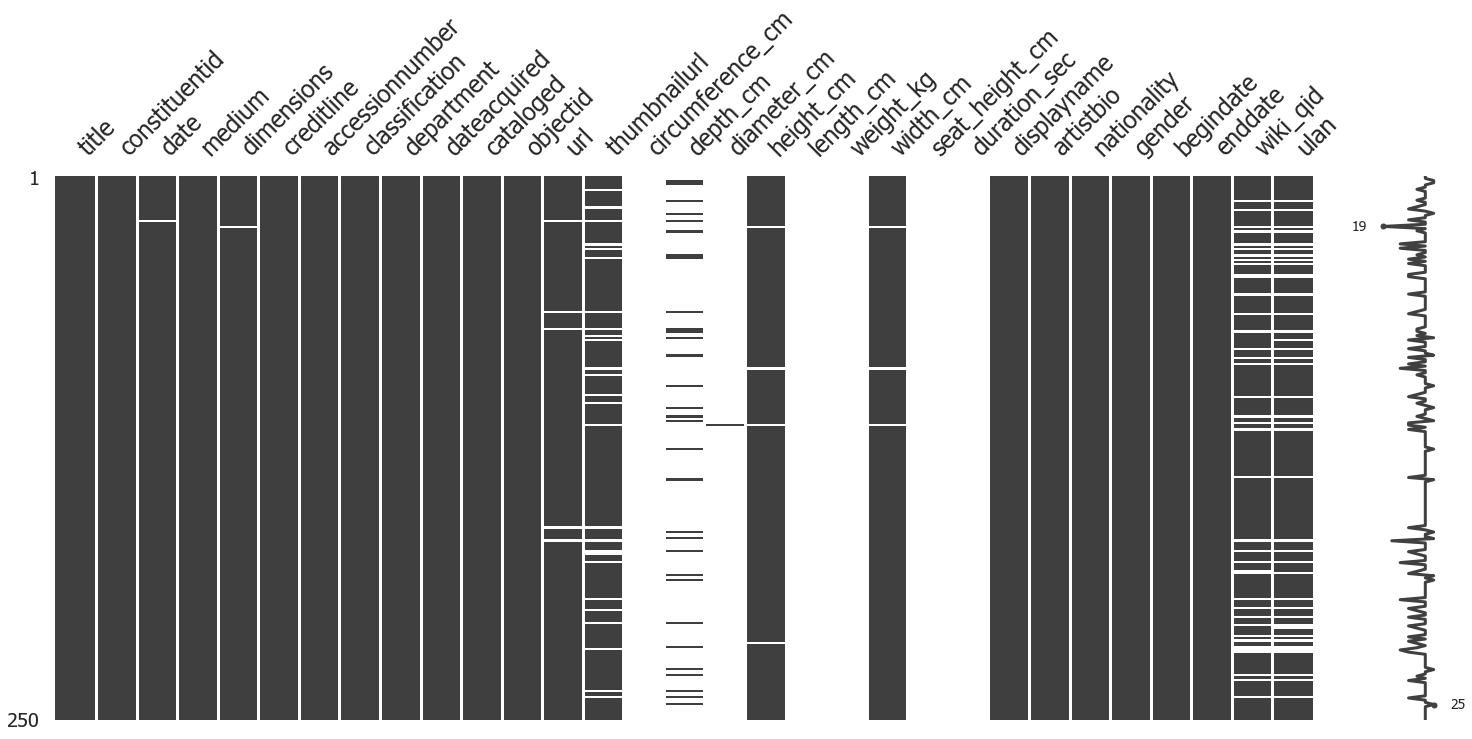

In [76]:
msno.matrix(paintings.sample(250), fontsize=24);

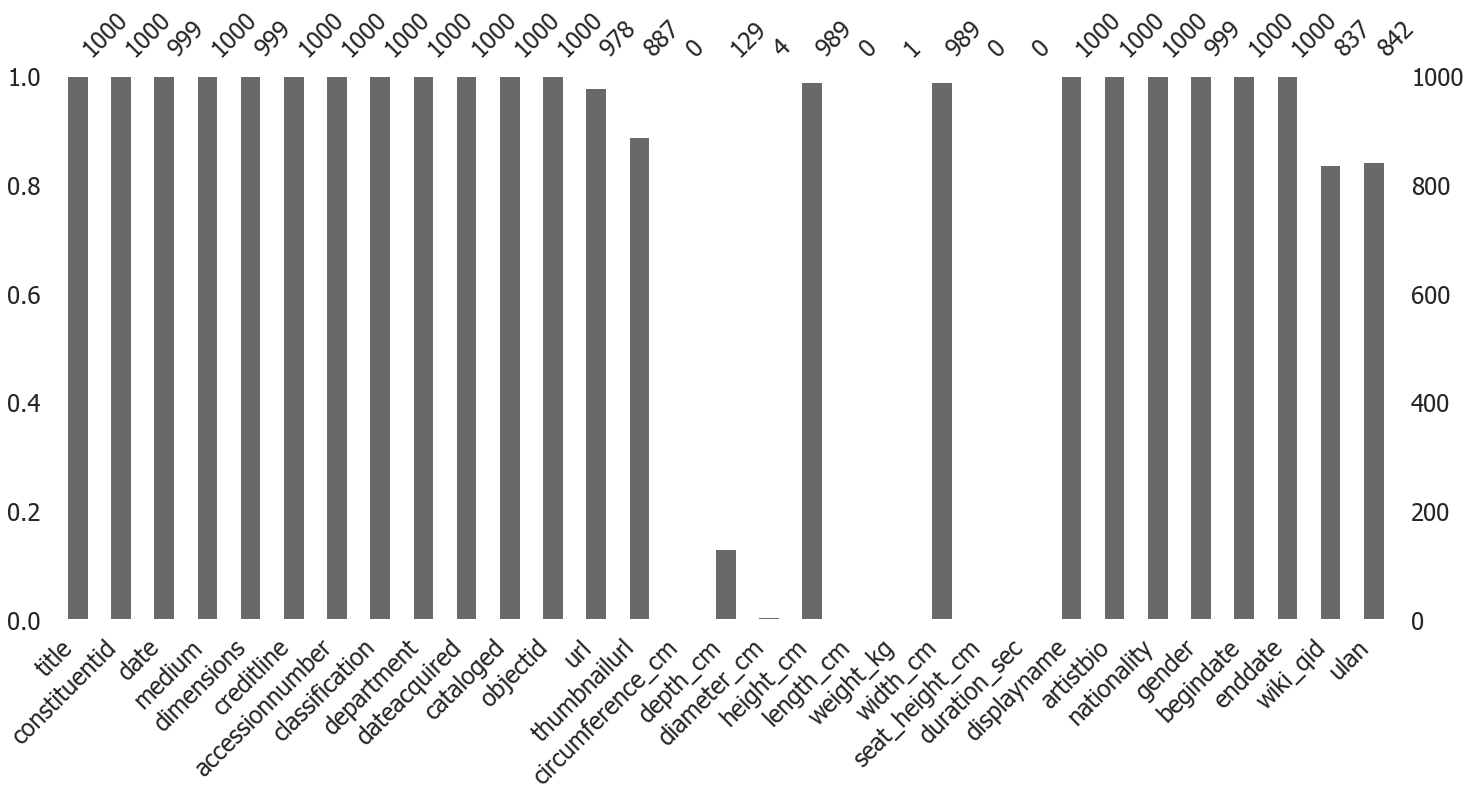

In [77]:
msno.bar(paintings.sample(1000), fontsize=24);

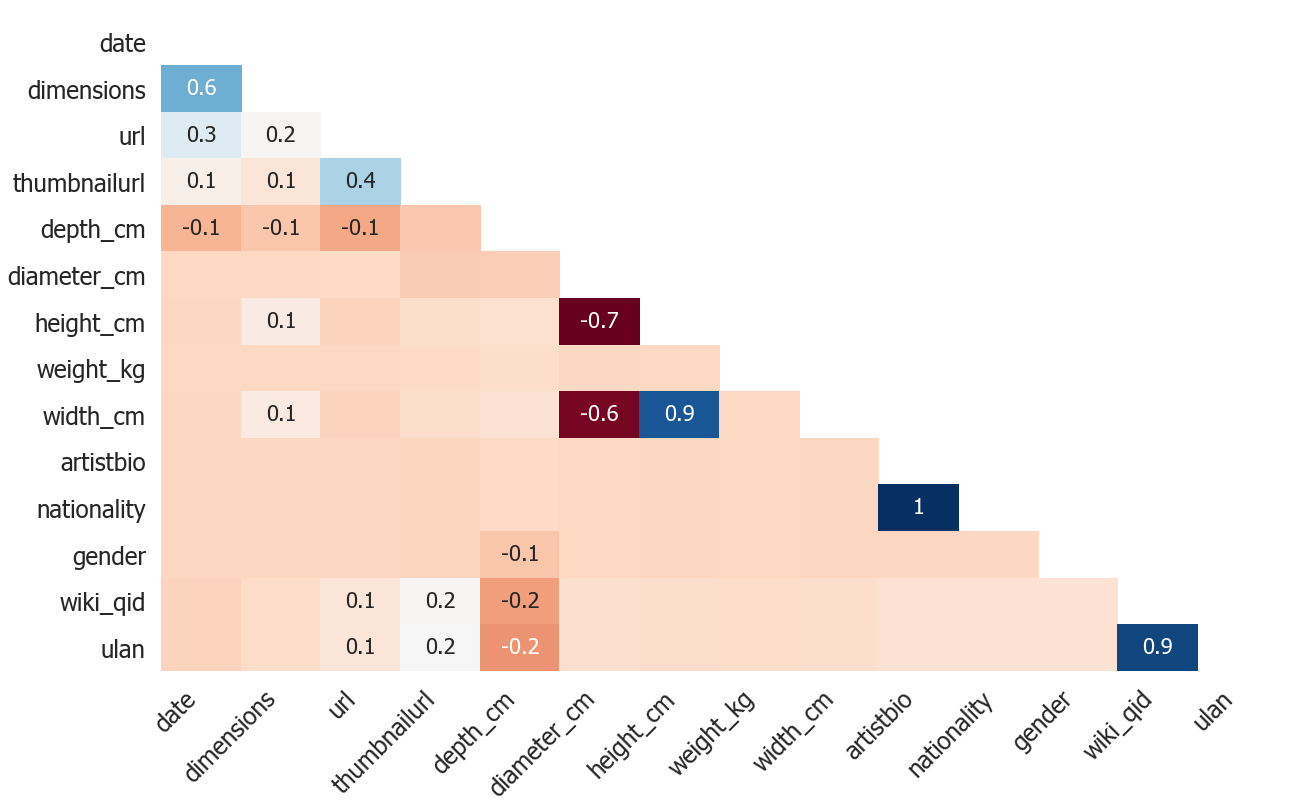

In [78]:
msno.heatmap(paintings, fontsize=24);

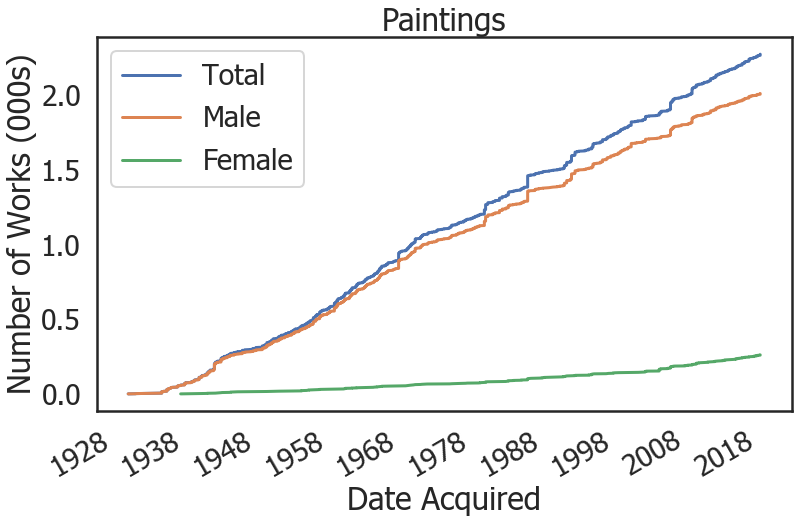

In [79]:
plot_gender_breakdown_over_time(paintings.reset_index(), title="Paintings")

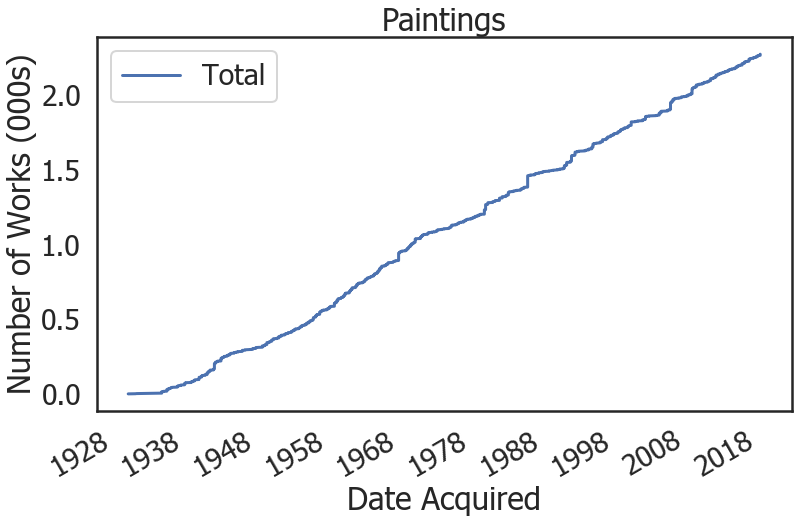

In [80]:
plot_total_over_time(paintings.reset_index(), title="Paintings")

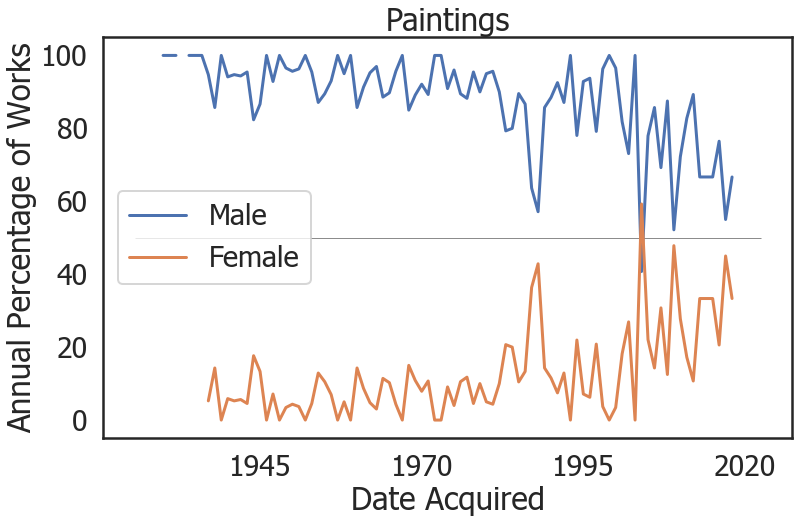

In [81]:
plot_gender_fraction_over_time(paintings.reset_index(), title="Paintings")

# Nationalities

In [82]:
print("Unique nationalities:", artists.nationality.nunique())
artists.nationality.value_counts().head(20)

Unique nationalities: 129


American               5404
German                  973
French                  883
British                 868
Italian                 551
Japanese                508
Swiss                   291
Dutch                   270
Austrian                247
Russian                 218
Nationality unknown     209
Canadian                205
Brazilian               168
Spanish                 157
Argentine               143
Swedish                 134
Polish                  134
Mexican                 134
Danish                  121
Chinese                  97
Name: nationality, dtype: int64

In [83]:
combined.constituentid.value_counts().head()

229     5044
710     3237
8595    2156
1633    1351
2002    1314
Name: constituentid, dtype: int64

In [84]:
5044 / 2283.

2.2093736311870344

In [142]:
just95 = combined[(combined.dateacquired > '1995-01-01') & (combined.dateacquired < '1996-01-01')]

In [161]:
just95[just95.classification.eq('Painting')].gender.value_counts()

male      13
female     1
Name: gender, dtype: int64

In [143]:
just95.shape

(960, 31)

In [144]:
just95.gender.value_counts()

female    499
male      446
Name: gender, dtype: int64

In [146]:
just95.creditline.value_counts().head(10)

Purchase                                                                   390
Purchase and partial gift of the architect in honor of Lily Auchincloss     55
Horace W. Goldsmith Fund through Robert B. Menschel                         42
Frances Keech Fund                                                          34
The Family of Man Fund                                                      34
Gift of the artist                                                          29
Gift of the designer                                                        16
Gift of the manufacturer                                                    15
Gift of William P. Mangold                                                  14
Grace M. Mayer Fund                                                         13
Name: creditline, dtype: int64

In [152]:
just95.displayname.value_counts().head(10)

Dorothea Lange       342
Cindy Sherman         75
Lee Friedlander       71
Bernard Tschumi       55
Giuseppe Penone       34
Nicholas Nixon        25
Louise Bourgeois      13
Rosemarie Trockel     10
Bill Traylor           9
Grace Hartigan         8
Name: displayname, dtype: int64

In [176]:
just95.groupby(['creditline', 'gender'])['title'].count().sort_values(ascending=False).head(10)

creditline                                                               gender
Purchase                                                                 female    371
Purchase and partial gift of the architect in honor of Lily Auchincloss  male       55
Frances Keech Fund                                                       male       34
Horace W. Goldsmith Fund through Robert B. Menschel                      male       33
The Family of Man Fund                                                   male       31
Gift of the artist                                                       male       26
Purchase                                                                 male       19
Grace M. Mayer Fund                                                      female     13
Gift of the designer                                                     male       13
Gift of the manufacturer                                                 male       10
Name: title, dtype: int64

In [177]:
combined.groupby(['creditline', 'gender'])['title'].count().sort_values(ascending=False).head(10)

creditline                                                              gender
The Louis E. Stern Collection                                           male      10764
Purchase                                                                male       6374
Abbott-Levy Collection. Partial gift of Shirley C. Burden               male       4929
Gift of the artist                                                      male       3695
                                                                        female     3362
The Gilbert and Lila Silverman Fluxus Collection Gift                   male       2993
Gift of the photographer                                                male       2509
Gift of Kleiner, Bell & Co.                                             male       1974
The Judith Rothschild Foundation Contemporary Drawings Collection Gift  male       1897
Gift of Abby Aldrich Rockefeller                                        male       1618
Name: title, dtype: int64

In [155]:
just95[just95.displayname.eq('Dorothea Lange')].creditline.value_counts(dropna=False)

Purchase    338
NaN           4
Name: creditline, dtype: int64

In [ ]:
creditline.eq("The Louis E. Stern Collection")

In [165]:
combined[combined.constituentid.eq('229')].set_index('dateacquired').groupby(pd.Grouper(freq='Y')).count()['date']

dateacquired
1940-12-31       2
1941-12-31      17
1942-12-31       0
1943-12-31       0
1944-12-31       0
1945-12-31       0
1946-12-31       0
1947-12-31       0
1948-12-31       0
1949-12-31       0
1950-12-31      40
1951-12-31       0
1952-12-31       0
1953-12-31       0
1954-12-31       0
1955-12-31       0
1956-12-31      21
1957-12-31       0
1958-12-31       0
1959-12-31       0
1960-12-31       0
1961-12-31       1
1962-12-31       0
1963-12-31       0
1964-12-31       0
1965-12-31       0
1966-12-31       0
1967-12-31       0
1968-12-31    4919
1969-12-31       0
1970-12-31       0
1971-12-31       0
1972-12-31       0
1973-12-31       0
1974-12-31       0
1975-12-31       0
1976-12-31       0
1977-12-31       0
1978-12-31       0
1979-12-31       0
1980-12-31      25
1981-12-31       0
1982-12-31       7
1983-12-31       0
1984-12-31       0
1985-12-31       1
1986-12-31       0
1987-12-31       0
1988-12-31       0
1989-12-31       0
1990-12-31       0
1991-12-31       1

In [85]:
combined[combined.constituentid.eq('229')].head()

,title,constituentid,date,medium,dimensions,creditline,accessionnumber,classification,department,dateacquired,cataloged,objectid,url,thumbnailurl,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,duration_sec,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
71450,Tuileries Sanglier / d'apres l'antique,229,1911,Albumen silver print,"8 11/16 x 6 9/16"" (22 x 16.7 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.1,Photograph,Photography,1968-03-06,Y,38879,http://www.moma.org/collection/works/38879,http://www.moma.org/media/W1siZiIsIjMwMTMwNCJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eugène Atget,"French, 1857–1927",French,male,1857,1927,Q322030,500008199.0
71451,Sapin (Trianon),229,1910-14,Albumen silver print,"Approx. 7 1/8 x 8 5/8"" (18.1 x 21.9 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.10,Photograph,Photography,1968-03-06,Y,38880,http://www.moma.org/collection/works/38880,http://www.moma.org/media/W1siZiIsIjMxODEwMSJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eugène Atget,"French, 1857–1927",French,male,1857,1927,Q322030,500008199.0
71452,"Versailles, vase par Ballin",229,1902,Matte albumen silver print,"Approx. 8 9/16 x 7 1/16"" (21.8 x 18 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.100,Photograph,Photography,1968-03-06,Y,38881,http://www.moma.org/collection/works/38881,http://www.moma.org/media/W1siZiIsIjMxODEwMiJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eugène Atget,"French, 1857–1927",French,male,1857,1927,Q322030,500008199.0
71453,Facteur,229,1899-1900,Gelatin silver printing-out-paper print,"Approx. 8 11/16 x 6 9/16"" (22 x 16.7 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.1000,Photograph,Photography,1968-03-06,Y,38882,http://www.moma.org/collection/works/38882,http://www.moma.org/media/W1siZiIsIjI4NjE4MiJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eugène Atget,"French, 1857–1927",French,male,1857,1927,Q322030,500008199.0
71454,Chiffonnier,229,1899-1900,Albumen silver print,"Approx. 8 11/16 x 7 1/16"" (22 x 18 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.1001,Photograph,Photography,1968-03-06,Y,38883,http://www.moma.org/collection/works/38883,http://www.moma.org/media/W1siZiIsIjI4NjE4MyJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eugène Atget,"French, 1857–1927",French,male,1857,1927,Q322030,500008199.0


In [167]:
combined[combined.constituentid.eq('229')].creditline.value_counts().head(5)

Abbott-Levy Collection. Partial gift of Shirley C. Burden                                                                   4929
Given anonymously                                                                                                             59
Gift of Edward Steichen                                                                                                       21
Modern print by Chicago Albumen Works from the original negative in the Abbott-Levy Collection, The Museum of Modern Art      15
Purchase                                                                                                                       7
Name: creditline, dtype: int64

In [86]:
combined[combined.constituentid.eq('710')].head()

,title,constituentid,date,medium,dimensions,creditline,accessionnumber,classification,department,dateacquired,cataloged,objectid,url,thumbnailurl,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,duration_sec,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
34722,"Homely Girl, A Life, volumes I and II",710,1992,Two volume illustrated book,"page (each): 11 1/2 × 8 11/16"" (29.2 × 22 cm);...",Gift of the artist,29.1993.A-B.x1,Illustrated Book,Prints & Illustrated Books,1993-01-18,Y,10114,http://www.moma.org/collection/works/10114,http://www.moma.org/media/W1siZiIsIjM0MzU3NCJd...,NaN,NaN,NaN,29.2,NaN,NaN,22.0,NaN,NaN,Louise Bourgeois,"American, born France. 1911–2010",American,female,1911,2010,Q159409,500057350.0
34723,"Untitled, plate 1 of 10, from the illustrated ...",710,1992,Drypoint,"plate: 6 5/8 x 4 15/16"" (16.8 x 12.5 cm); page...",Gift of the artist,29.1993.A01.x1,Illustrated Book,Prints & Illustrated Books,1993-01-18,Y,10115,http://www.moma.org/collection/works/10115,http://www.moma.org/media/W1siZiIsIjM0MzYzMiJd...,NaN,NaN,NaN,16.8,NaN,NaN,12.5,NaN,NaN,Louise Bourgeois,"American, born France. 1911–2010",American,female,1911,2010,Q159409,500057350.0
34724,"Untitled, plate 2 of 10, from the illustrated ...",710,1992,Drypoint,"plate: 7 3/8 x 5 3/8"" (18.7 x 13.6 cm); page: ...",Gift of the artist,29.1993.A02.x1,Illustrated Book,Prints & Illustrated Books,1993-01-18,Y,10116,http://www.moma.org/collection/works/10116,http://www.moma.org/media/W1siZiIsIjM0MzYzMyJd...,NaN,NaN,NaN,18.7,NaN,NaN,13.6,NaN,NaN,Louise Bourgeois,"American, born France. 1911–2010",American,female,1911,2010,Q159409,500057350.0
34725,"Untitled, plate 3 of 10, from the illustrated ...",710,1992,Drypoint,"plate: 7 5/16 x 5 3/8"" (18.6 x 13.7 cm); page:...",Gift of the artist,29.1993.A03.x1,Illustrated Book,Prints & Illustrated Books,1993-01-18,Y,10117,http://www.moma.org/collection/works/10117,http://www.moma.org/media/W1siZiIsIjM0MzYzNCJd...,NaN,NaN,NaN,18.6,NaN,NaN,13.7,NaN,NaN,Louise Bourgeois,"American, born France. 1911–2010",American,female,1911,2010,Q159409,500057350.0
34726,"Untitled, plate 4 of 10, from the illustrated ...",710,1992,Drypoint,"plate: 7 5/16 x 5 3/8"" (18.6 x 13.6 cm); page:...",Gift of the artist,29.1993.A04.x1,Illustrated Book,Prints & Illustrated Books,1993-01-18,Y,10118,http://www.moma.org/collection/works/10118,http://www.moma.org/media/W1siZiIsIjM0MzYzNSJd...,NaN,NaN,NaN,18.6,NaN,NaN,13.6,NaN,NaN,Louise Bourgeois,"American, born France. 1911–2010",American,female,1911,2010,Q159409,500057350.0


In [87]:
works.medium.value_counts().head(20)

Gelatin silver print                       14820
Lithograph                                  7230
Albumen silver print                        4774
Lithograph, printed in color                1657
Etching                                     1596
Letterpress                                 1547
Chromogenic color print                     1544
Pencil on paper                             1451
Lithograph, printed in black                1337
Ink on paper                                1303
Offset lithograph                           1067
Oil on canvas                               1057
Drypoint                                    1035
Video (color, sound)                        1006
Woodcut                                      947
Gelatin silver printing-out-paper print      908
Screenprint                                  852
35mm film                                    692
Poster                                       651
Etching, printed in black                    643
Name: medium, dtype:

In [88]:
works.classification.value_counts().head(100)

Print                             30684
Photograph                        30644
Illustrated Book                  26256
Drawing                           12077
Design                            11536
Architecture                       3073
Video                              2647
Film                               2438
Painting                           2283
Sculpture                          1685
Multiple                           1091
Mies van der Rohe Archive           863
Installation                        776
Audio                               719
Periodical                          704
(not assigned)                      693
Work on Paper                       171
Ephemera                            138
Frank Lloyd Wright Archive           61
Media                                39
Performance                          29
Textile                              27
Collage                               9
Poster                                7
Photography Research/Reference        5


In [89]:
works[works.classification.eq('Painting')]['medium'].value_counts().head(10)

Oil on canvas                        1052
Synthetic polymer paint on canvas     117
Oil on composition board               55
Casein tempera on hardboard            30
Ink and stamps on postcard             27
Oil on wood                            21
Synthetic polymer paint on wood        18
Tempera on poster board                18
Oil on linen                           17
Oil on canvas, two panels              15
Name: medium, dtype: int64

In [90]:
works[works.cataloged.eq('Y')]['classification'].value_counts().head(10)

Print               21377
Photograph          15820
Drawing             10889
Design               9162
Illustrated Book     5230
Architecture         2625
Video                2234
Painting             2233
Sculpture            1509
Film                 1206
Name: classification, dtype: int64

In [91]:
works[works.classification.eq('Painting') & (works.cataloged.eq('Y'))]['medium'].value_counts().head(10)

Oil on canvas                        1051
Synthetic polymer paint on canvas     117
Oil on composition board               55
Casein tempera on hardboard            30
Ink and stamps on postcard             27
Oil on wood                            21
Oil on linen                           17
Oil on canvas, two panels              15
Casein and wax on mahogany             12
Oil on burlap                          11
Name: medium, dtype: int64

In [92]:
works.classification.value_counts() - works[works.cataloged.eq('Y')]['classification'].value_counts()

(not assigned)                      691.0
Architectural Model                   0.0
Architecture                        448.0
Audio                               298.0
Collage                               1.0
Design                             2374.0
Drawing                            1188.0
Ephemera                             63.0
Film                               1232.0
Frank Lloyd Wright Archive           24.0
Furniture and Interiors               NaN
Graphic Design                        0.0
Illustrated Book                  21026.0
Installation                        391.0
Media                                32.0
Mies van der Rohe Archive           270.0
Multiple                            417.0
News Clipping                         0.0
Painting                             50.0
Performance                           5.0
Periodical                          209.0
Photograph                        14824.0
Photography Research/Reference        4.0
Poster                            

# Artist age at death

In [93]:
artists[artists.begindate > 0].begindate.min()

1730

In [94]:
artists[artists.enddate > 0].enddate.max()

2018

In [95]:
dead_artists = artists[(artists.enddate > 0) & (artists.begindate > 0)].copy()

In [96]:
dead_artists.head()

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
9,11,Jean (Hans) Arp,"French, born Germany (Alsace). 1886–1966",French,male,1886,1966,Q153739,500031000.0
11,13,J. Arrelano Fischer,"Mexican, 1911–1995",Mexican,male,1911,1995,NaN,NaN
12,15,Folke Arstrom,"Swedish, 1907–1997",Swedish,male,1907,1997,NaN,NaN
13,16,Cristobal Arteche,"Spanish, 1900–1964",Spanish,male,1900,1964,NaN,NaN


In [97]:
dead_artists['age'] = dead_artists['enddate'] - dead_artists['begindate']

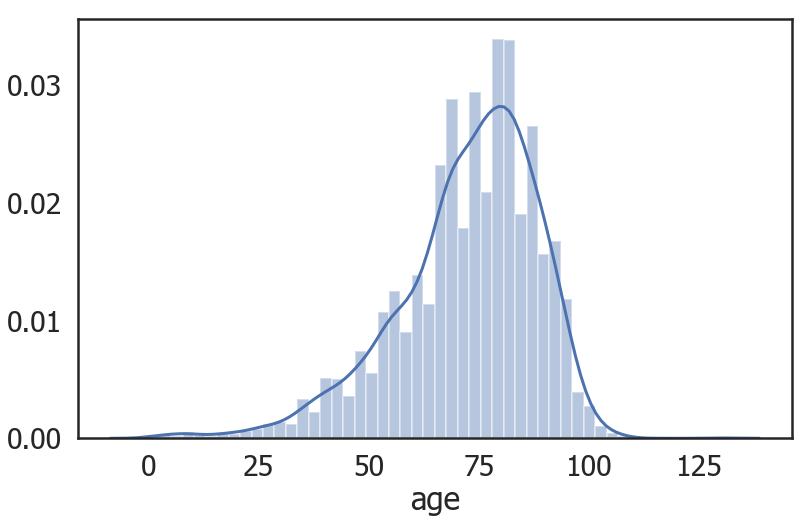

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(dead_artists['age'])
fig.tight_layout();

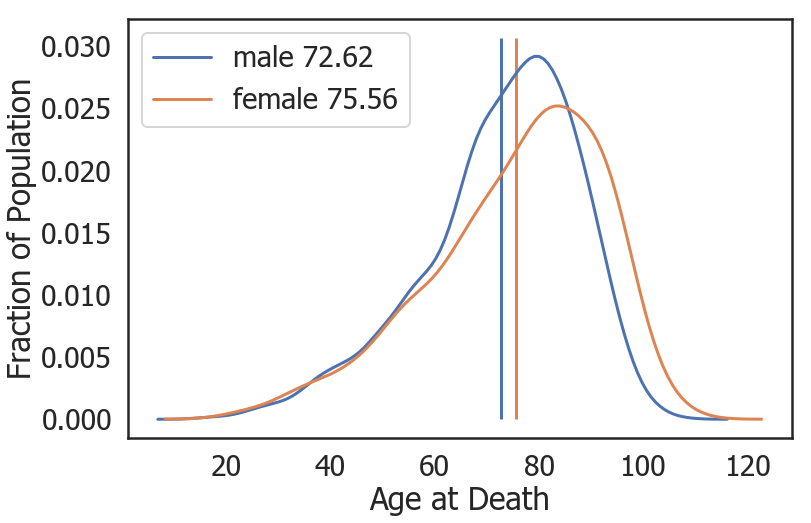

In [99]:
av_female = np.mean(dead_artists[dead_artists.gender.eq('female')]['age'])
av_male = np.mean(dead_artists[dead_artists.gender.eq('male')]['age'])
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(
    dead_artists[dead_artists.gender.eq('male')]['age'],
    hist=False,
    label=f'male {av_male:.2f}')
sns.distplot(
    dead_artists[dead_artists.gender.eq('female')]['age'],
    hist=False,
    label=f'female {av_female:.2f}')
ylims = ax.get_ylim()
ax.vlines(
    av_male,
    ylims[0],
    ylims[1],
    colors=sns.color_palette()[0])
ax.vlines(
    av_female,
    ylims[0],
    ylims[1],
    colors=sns.color_palette()[1])
ax.set_ylabel("Fraction of Population")
ax.set_xlabel("Age at Death")
ax.legend(loc='best')
ax.set_ylim = ylims
fig.tight_layout()